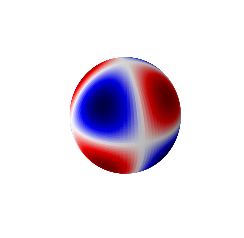

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m, l = 2, 3

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
ax.set_axis_off()
plt.show()

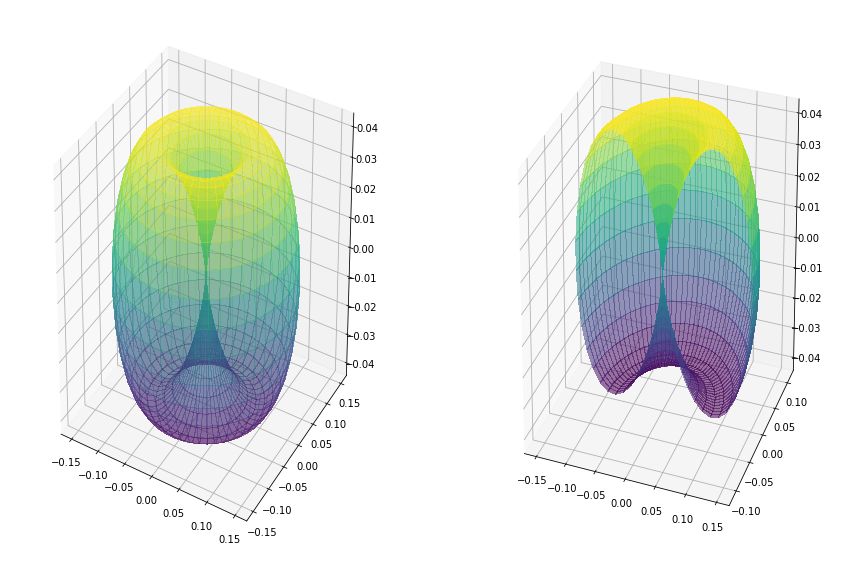

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from scipy.special import sph_harm
myfigsize=(15,10);

az=-70
el=25

l=2
m=2

theta, phi = np.linspace(0, 2 * np.pi, 50), np.linspace(0, np.pi, 50)
THETA, PHI = np.meshgrid(theta, phi)
#R = sph_harm(2,2,theta, phi).real
R = (sph_harm(m,l,THETA, PHI)*np.conj(sph_harm(m,l,THETA, PHI))).real
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure(figsize=myfigsize)
ax = fig.add_subplot(1,2,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('viridis'),
    linewidth=0, antialiased=False, alpha=0.4)

theta2, phi2 = np.linspace(0, 1 * np.pi, 50), np.linspace(0, np.pi, 50)
THETA2, PHI2 = np.meshgrid(theta2, phi2)
#R = sph_harm(2,2,theta, phi).real
R2 = (sph_harm(m,l,THETA2, PHI2)*np.conj(sph_harm(m,l,THETA2, PHI2))).real
X2 = R2 * np.sin(PHI2) * np.cos(THETA2)
Y2 = R2 * np.sin(PHI2) * np.sin(THETA2)
Z2 = R2 * np.cos(PHI2)
ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.set_ylim([-0.12,  0.12])
ax2.view_init(el,az)
plot = ax2.plot_surface(
    X2, Y2, Z2, rstride=1, cstride=1, cmap=plt.get_cmap('viridis'),
    linewidth=0, antialiased=False, alpha=0.55)

#r2 = (sph_harm(m,l,theta2, phi2)*np.conj(sph_harm(m,l,theta2, phi2))).real
#x2 = r2 * np.sin(phi2) * np.cos(theta2)
#z2 = r2 * np.cos(phi2)
#ax2.scatter(x2,z2,zdir='y',c='k')

plt.show()

In [4]:
from ipywidgets import interact, interactive, fixed

l=3
m=2

theta, phi = np.linspace(0, 2 * np.pi, 50), np.linspace(0, np.pi, 50)
THETA, PHI = np.meshgrid(theta, phi)
#R = sph_harm(2,2,theta, phi).real
R = (sph_harm(m,l,THETA, PHI)*np.conj(sph_harm(m,l,THETA, PHI))).real
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)

az=-60

def plot_sph_harm(el=25):
    fig = plt.figure(figsize=(12,12))
   
    ax3 = fig.add_subplot(1,1,1, projection='3d')
    ax3.view_init(el,az)
    plot = ax3.plot_surface(
        X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('viridis'),
        linewidth=0, antialiased=False, alpha=0.4)
    plt.show()
    
interact(plot_sph_harm,el=(0,90,5))

A Jupyter Widget

<function __main__.plot_sph_harm>

In [5]:
l=3
m=2
zl=0.4

az=-60

theta, phi = np.linspace(0, 2 * np.pi, 60), np.linspace(0, np.pi, 60)
THETA, PHI = np.meshgrid(theta, phi)

def plot_sph_harm(l=0,m=0,el=25):

    R = (sph_harm(m,l,THETA, PHI)*np.conj(sph_harm(m,l,THETA, PHI))).real
    X = R * np.sin(PHI) * np.cos(THETA)
    Y = R * np.sin(PHI) * np.sin(THETA)
    Z = R * np.cos(PHI)

    fig = plt.figure(figsize=(12,12))
   
    ax4 = fig.add_subplot(1,1,1, projection='3d')
    #ax4.set_zlim([-zl,  zl])
    ax4.view_init(el,az)
    plot = ax4.plot_surface(
        X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('viridis'),
        linewidth=0, antialiased=False, alpha=0.4)
    plt.show()
    
interact(plot_sph_harm,l=range(0,7), m=range(0,7),el=(0,50))

A Jupyter Widget

<function __main__.plot_sph_harm>

In [6]:
from scipy.special import factorial2

zl=0.2

az=-60

theta, phi = np.linspace(0, 2 * np.pi, 60), np.linspace(0, np.pi, 60)
THETA, PHI = np.meshgrid(theta, phi)

def plot_sph_harm(l=0,el=25):

    R = (factorial2(2*l-1)**2)*((2*l+1)/(4*np.pi*np.math.factorial(2*l))) *(np.sin(PHI)**(2*l))
    X = R * np.sin(PHI) * np.cos(THETA)
    Y = R * np.sin(PHI) * np.sin(THETA)
    Z = R * np.cos(PHI)

    fig = plt.figure(figsize=(12,12))
   
    ax4 = fig.add_subplot(1,1,1, projection='3d')
    ax4.set_zlim([-zl,  zl])
    ax4.view_init(el,az)
    plot = ax4.plot_surface(
        X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('viridis'),
        linewidth=0, antialiased=False, alpha=0.4)
    plt.show()
    
interact(plot_sph_harm,l=(1,25,1),el=(0,50,5))

A Jupyter Widget

<function __main__.plot_sph_harm>